In [1]:
import fetch_data as f
import process_data as p
import graph_data as g

# establish universal regions, plus a scrap bin
region_list = ["w", "m", "s", "n"]

# request dataset from online and store it in a variable
f.write_to_csv("https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/download/209268.17.17.tar.gz","209268.17.17.tar.gz",)

disaster_data = p.read_csv_to_var(
    "./0209268/17.17/data/0-data/events-US-1980-2023.csv"
)

# modify dates to be less specific years
p.parse_all_years(disaster_data)

# universal variables
all_years = p.retrieve_unique_years(disaster_data)
all_disaster_types = p.retrieve_unique_disaster_types(disaster_data)
year_buckets = [] # TO FILL. buckets to group time data by (one/four/five/ten-year groups)

# convert the raw data (sorted by region) into graphable blocks of data
region_dict = p.fill_all_regions(disaster_data, region_list)
cost_of_regions, deaths_of_regions = p.organize_regions(region_dict, all_years, all_disaster_types)


now we graph!

{'Flooding': [2678.6, 0, 4807.9, 0, 0, 0, 0, 0, 0, 2396.3, 0, 0, 0, 2050.0, 0, 0, 0, 1761.7, 0, 1584.0, 0, 0, 0, 0, 0, 0, 0, 0, 1275.9, 3218.0, 4150.5, 0, 0, 0, 5853.1, 19439.1, 0, 0, 3630.0, 0, 1530.1, 0, 1111.0], 'Tropical Cyclone': [2177.2, 0, 0, 9180.0, 0, 3684.6, 0, 0, 23584.8, 0, 0, 58860.0, 0, 2066.9, 11086.5, 9763.8, 0, 14409.3, 11878.5, 0, 14743.1, 3832.7, 9103.5, 87150.8, 256713.30000000002, 0, 0, 52168.3, 0, 0, 3392.1, 3675.4, 0, 0, 0, 12700.0, 328600.0, 59499.8, 7932.0, 53099.700000000004, 86327.4, 119933.0, 3490.6], 'Drought': [0, 0, 0, 9307.3, 0, 0, 5050.2, 0, 0, 0, 0, 0, 2704.8, 0, 0, 0, 0, 6703.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3150.0, 0, 0, 0, 0, 0, 0], 'Freeze': [0, 2019.2, 0, 0, 0, 3492.0, 0, 0, 5080.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1260.0, 0, 0, 0, 0, 0, 0], 'Severe Storm': [0, 0, 0, 0, 0, 0, 0, 0, 1367.6, 0, 0, 1418.9, 0, 0, 1161.5, 0, 1877.0, 0, 0, 1235.1, 0, 0, 1683.8, 0, 1375.4, 0, 3736.7,

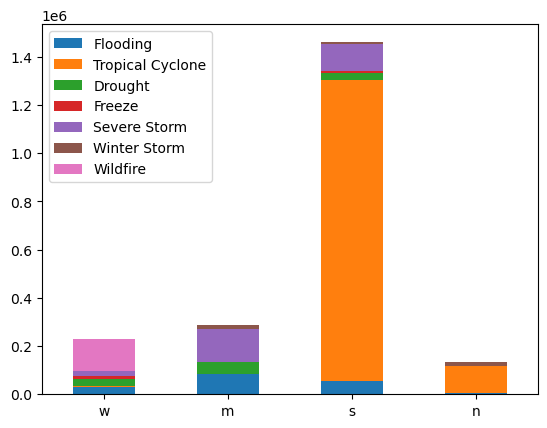

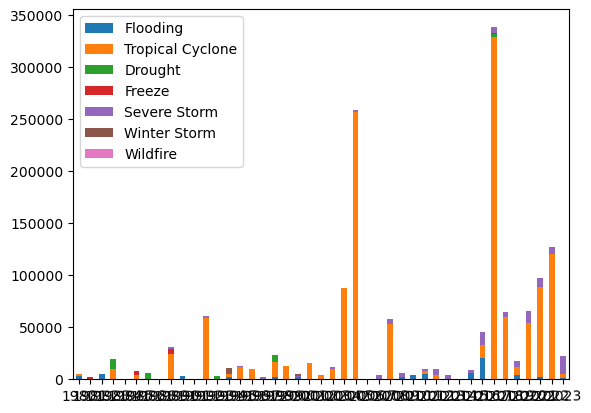

In [2]:
all_regions_cost = g.plottable_by_region(cost_of_regions,all_disaster_types)
g.plot_dataframe(all_regions_cost)

south_cost = g.plottable_by_time(cost_of_regions,"s",all_years)
g.plot_dataframe(south_cost)